This is used to reduce the number of feature

Two types :

1.Feature Selection (Subset of original features)

2.Feature Extraction (Creates new one)

Advantages of Dimensionality Reduction:

.Less space is required

.Less computation time

.removes redundant features


#### Feature Selection
###### Backward Feature Elimination

###### Forward Feature Elimination

###### Random Forest

In [2]:
#Feature Selection
#Import Libraries
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

#Read the data
df = pd.read_csv("pima-data.csv")

#Check the Correlation
#df.corr()
#Delete the correlated feature
del df['skin']

#Data Molding
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

#Splitting the data
from sklearn.model_selection import train_test_split

#This will copy all columns from 0 to 7(8 - second place counts from 1)
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [5]:
#Imputing
from sklearn.impute import SimpleImputer 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.transform(X_test)

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [6]:
sfs_c = sfs(nb_model, k_features = 6, forward = True, floating=False, verbose=3, scoring = 'accuracy', cv=4)

sfs_c = sfs_c.fit(X_train, y_train)

feature_select = list(sfs_c.k_feature_idx_)
print(feature_select)

nb_model = GaussianNB()
nb_model.fit(X_train[:, feature_select], y_train)

y_train_pred = nb_model.predict(X_train[:, feature_select])


from sklearn.metrics import accuracy_score

print("Accuracy: %s" % accuracy_score(y_train, y_train_pred) )


y_test_pred = nb_model.predict(X_test[:, feature_select])
print("Accuracy: %s" % accuracy_score(y_test, y_test_pred) )

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2021-03-09 10:30:01] Features: 1/6 -- score: 0.7541044776119403[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-03-09 10:30:01] Features: 2/6 -- score: 0.7726920950801548[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parall

[0, 1, 2, 5, 6, 7]
Accuracy: 0.776536312849162
Accuracy: 0.7359307359307359


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2021-03-09 10:30:01] Features: 6/6 -- score: 0.7764648977335545

#### Principal Component Analysis (PCA)

This is a type of unsupervised learning method.

In [8]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt


#Read the data
df = pd.read_csv("pima-data.csv")

#Check the Correlation
#df.corr()
#Delete the correlated feature
del df['skin']

#Data Molding
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

#Splitting the data
from sklearn.model_selection import train_test_split

#This will copy all columns from 0 to 7(8 - second place counts from 1)
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [9]:
#Imputing
from sklearn.impute import SimpleImputer 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [11]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explain_var = pca.explained_variance_ratio_
print(explain_var)

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print(metrics.accuracy_score(y_train, nb_predict_train))



nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, nb_predict_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_predict_test)
print(cm)

[0.6254679 0.3745321]
0.7392923649906891
0.670995670995671
[[116  35]
 [ 41  39]]


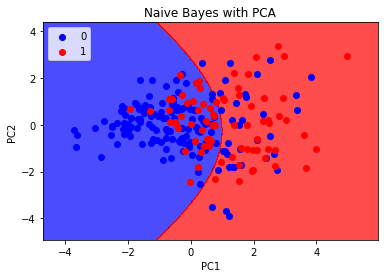

In [12]:
#import numpy as np
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Number of components')
#plt.ylabel('cumulative explained variance')

from matplotlib.colors import ListedColormap
import numpy as np
#Define Variables
clf = nb_model
h = 0.01
X_plot, z_plot = X_test, y_test 

#Standard Template to draw graph
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh
Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,
             alpha = 0.7, cmap = ListedColormap(('blue', 'red')))


for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(X_plot[z_plot == j, 0], X_plot[z_plot == j, 1],
                c = ['blue', 'red'][i], cmap = ListedColormap(('blue', 'red')), label = j)
   #X[:, 0], X[:, 1] 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Naive Bayes with PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

##### Advantage of PCA

.Improves performance of Algorithm(less feature)

.Help in removing correlated feature

.Reduce overfitting

#### Linear Discriminant Analysis (LDA)

It is supervised as it considers Dependent Variable.

In [14]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt


#Read the data
df = pd.read_csv("pima-data.csv")

#Check the Correlation
#df.corr()
#Delete the correlated feature
del df['skin']

#Data Molding
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

#Splitting the data
from sklearn.model_selection import train_test_split

#This will copy all columns from 0 to 7(8 - second place counts from 1)
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

#Imputing
from sklearn.impute import SimpleImputer 

#Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [15]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
explain_var = lda.explained_variance_ratio_
print(explain_var)

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print(metrics.accuracy_score(y_train, nb_predict_train))



nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, nb_predict_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_predict_test)
print(cm)

[1.]
0.7821229050279329
0.7445887445887446
[[125  26]
 [ 33  47]]
